In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [155]:
data = pd.read_csv("data/einkommen.train",delimiter=",",header=None)
data.columns = ["Age","Employment_Type","Weighing_Factor","Education_Level","Schooling","Marital_Status","Employment_Area","Partnership","Ethnicity","Gender","Gains_FA","Loss_FA","Working_Time","Country_of_Birth","Income"]
data.head()

,Age,Employment_Type,Weighing_Factor,Education_Level,Schooling,Marital_Status,Employment_Area,Partnership,Ethnicity,Gender,Gains_FA,Loss_FA,Working_Time,Country_of_Birth,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               30000 non-null  int64 
 1   Employment_Type   30000 non-null  object
 2   Weighing_Factor   30000 non-null  int64 
 3   Education_Level   30000 non-null  object
 4   Schooling         30000 non-null  int64 
 5   Marital_Status    30000 non-null  object
 6   Employment_Area   30000 non-null  object
 7   Partnership       30000 non-null  object
 8   Ethnicity         30000 non-null  object
 9   Gender            30000 non-null  object
 10  Gains_FA          30000 non-null  int64 
 11  Loss_FA           30000 non-null  int64 
 12  Working_Time      30000 non-null  int64 
 13  Country_of_Birth  30000 non-null  object
 14  Income            30000 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.4+ MB


In [157]:
data.describe().round(2)

,Age,Weighing_Factor,Schooling,Gains_FA,Loss_FA,Working_Time
count,30000.00,30000.00,30000.00,30000.00,30000.00,30000.00
mean,38.58,189767.51,10.08,1091.69,86.62,40.43
std,13.65,105442.01,2.57,7467.39,401.53,12.31
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117833.00,9.00,0.00,0.00,40.00
50%,37.00,178478.00,10.00,0.00,0.00,40.00
75%,48.00,236938.50,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


In [162]:
data.Income.notna()

0         True
1         True
2         True
3         True
4         True
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: Income, Length: 30000, dtype: bool

In [163]:
# Splitting the data into those with the target feature and those without the target feature
data = data.replace({" ?":np.nan})
data_w_income = data[data.Income.notna()]
data_no_income = data[data.Income.isna()]
print("Data with Income: ",len(data_w_income))
print("Data without Income: ",len(data_no_income))

Data with Income:  5000
Data without Income:  25000


In [165]:
data_w_income.Income.unique()

array([' <=50K', ' >50K'], dtype=object)

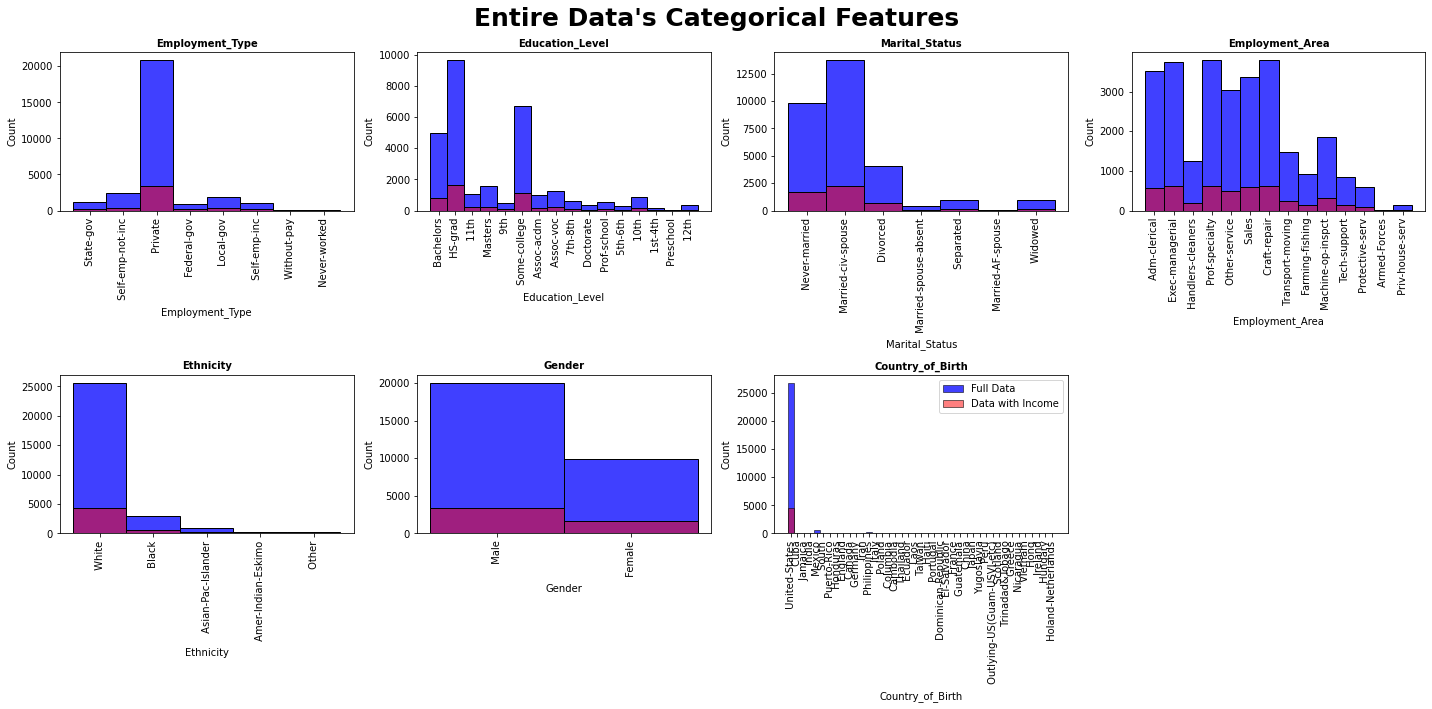

In [178]:
fig,axes = plt.subplots(2,4,figsize=(20,10))

sns.histplot(data[data.columns.values[1]],ax=axes[0,0],color="b",label="Full Data");
sns.histplot(data_w_income[data_w_income.columns.values[1]],ax=axes[0,0],color="r",alpha=0.5,label="Data with Income");
axes[0,0].tick_params(axis='x', labelrotation=90)
axes[0,0].set_title(data.columns.values[1],fontsize=10,fontweight="bold");

sns.histplot(data[data.columns.values[3]],ax=axes[0,1],color="b",label="Full Data");
sns.histplot(data_w_income[data_w_income.columns.values[3]],ax=axes[0,1],color="r",alpha=0.5,label="Data with Income");
axes[0,1].tick_params(axis='x', labelrotation=90)
axes[0,1].set_title(data.columns.values[3],fontsize=10,fontweight="bold");

sns.histplot(data[data.columns.values[5]],ax=axes[0,2],color="b",label="Full Data");
sns.histplot(data_w_income[data_w_income.columns.values[5]],ax=axes[0,2],color="r",alpha=0.5,label="Data with Income");
axes[0,2].tick_params(axis='x', labelrotation=90)
axes[0,2].set_title(data.columns.values[5],fontsize=10,fontweight="bold");

sns.histplot(data[data.columns.values[6]],ax=axes[0,3],color="b",label="Full Data");
sns.histplot(data_w_income[data_w_income.columns.values[6]],ax=axes[0,3],color="r",alpha=0.5,label="Data with Income");
axes[0,3].tick_params(axis='x', labelrotation=90)
axes[0,3].set_title(data.columns.values[6],fontsize=10,fontweight="bold");

sns.histplot(data[data.columns.values[8]],ax=axes[1,0],color="b",label="Full Data");
sns.histplot(data_w_income[data_w_income.columns.values[8]],ax=axes[1,0],color="r",alpha=0.5,label="Data with Income");
axes[1,0].tick_params(axis='x', labelrotation=90)
axes[1,0].set_title(data.columns.values[8],fontsize=10,fontweight="bold");

sns.histplot(data[data.columns.values[9]],ax=axes[1,1],color="b",label="Full Data");
sns.histplot(data_w_income[data_w_income.columns.values[9]],ax=axes[1,1],color="r",alpha=0.5,label="Data with Income");
axes[1,1].tick_params(axis='x', labelrotation=90)
axes[1,1].set_title(data.columns.values[9],fontsize=10,fontweight="bold");

sns.histplot(data[data.columns.values[13]],ax=axes[1,2],color="b",label="Full Data");
sns.histplot(data_w_income[data_w_income.columns.values[13]],ax=axes[1,2],color="r",alpha=0.5,label="Data with Income");
axes[1,2].tick_params(axis='x', labelrotation=90)
axes[1,2].set_title(data.columns.values[13],fontsize=10,fontweight="bold");

fig.delaxes(axes[1,3]);

fig.suptitle("Entire Data's Categorical Features",fontsize=25,fontweight="bold")
plt.legend(loc="best")

plt.tight_layout()

In [181]:
log_features = ["Age","Weighing_Factor","Gains_FA","Loss_FA"]
gaussian_features = ["Schooling","Working_Time"]

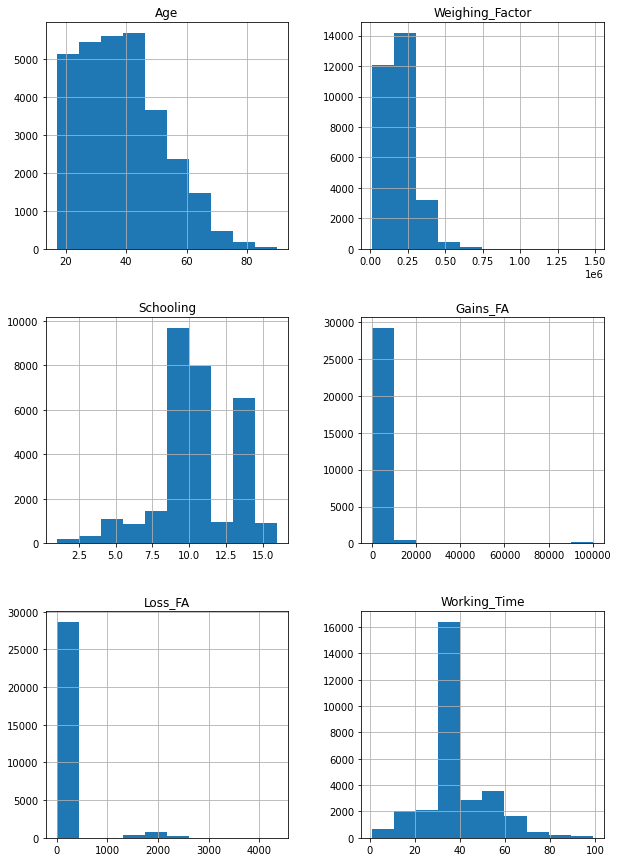

In [182]:
data.hist(figsize=(10,15));

In [90]:
log_features = ["Age","Weighing_Factor","Gains_FA","Loss_FA"]
gaussian_features = ["Schooling","Working_Time"]

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Weighing_Factor'}>],
       [<AxesSubplot:title={'center':'Gains_FA'}>,
        <AxesSubplot:title={'center':'Loss_FA'}>]], dtype=object)

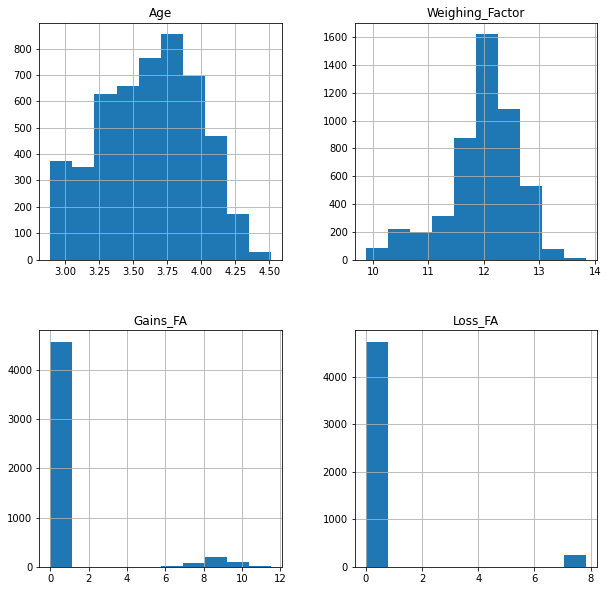

In [93]:
log_features_vals = np.log1p(data_w_income[log_features])
log_feature_df = pd.DataFrame(log_features_vals,columns=log_features)
log_feature_df.hist(figsize=(10,10))

array([[<AxesSubplot:title={'center':'Schooling'}>,
        <AxesSubplot:title={'center':'Working_Time'}>]], dtype=object)

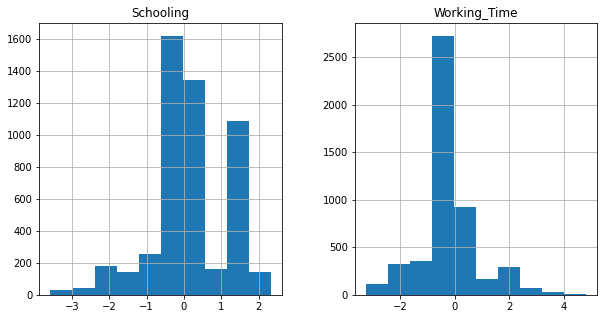

In [95]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
gaussian_feature_df = pd.DataFrame(ss.fit_transform(data_w_income[gaussian_features]),columns=gaussian_features)
gaussian_feature_df.hist(figsize=(10,5))

In [52]:
df = data_w_income_cleaned.copy()

In [54]:
df.head(10)

,Age,Employment_Type,Weighing_Factor,Education_Level,Schooling,Marital_Status,Employment_Area,Partnership,Ethnicity,Gender,Gains_FA,Loss_FA,Working_Time,Country_of_Birth,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


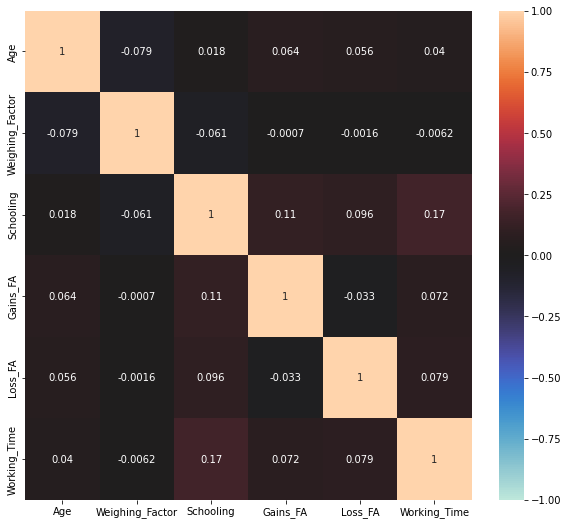

In [55]:
plt.figure(figsize=(10,9))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

In [71]:
for i in df.Country_of_Birth.unique().tolist():
    print(f"{i} : {np.round((len(df[df.Country_of_Birth == i])/len(df))*100,2)}%")
    
# print(f"United States : {np.round((len(df[df.Country_of_Birth == ' United-States'])/len(df))*100,2)}%")
# print(f"Mexico : {np.round((len(df[df.Country_of_Birth == ' Mexico'])/len(df))*100,2)}%")

 United-States : 89.3%
 Cuba : 0.28%
 Jamaica : 0.3%
 India : 0.24%
nan : 0.0%
 Mexico : 2.08%
 South : 0.18%
 Puerto-Rico : 0.32%
 Honduras : 0.06%
 England : 0.32%
 Canada : 0.56%
 Germany : 0.44%
 Iran : 0.22%
 Philippines : 0.44%
 Italy : 0.24%
 Poland : 0.18%
 Columbia : 0.1%
 Cambodia : 0.08%
 Thailand : 0.04%
 Ecuador : 0.08%
 Laos : 0.04%
 Taiwan : 0.2%
 Haiti : 0.12%
 Portugal : 0.14%
 Dominican-Republic : 0.26%
 El-Salvador : 0.32%
 France : 0.06%
 Guatemala : 0.2%
 China : 0.3%
 Japan : 0.18%
 Yugoslavia : 0.04%
 Peru : 0.06%
 Outlying-US(Guam-USVI-etc) : 0.06%
 Scotland : 0.02%
 Trinadad&Tobago : 0.08%
 Greece : 0.12%
 Nicaragua : 0.1%
 Vietnam : 0.2%
 Hong : 0.02%
 Ireland : 0.08%


In [96]:
numeric_df = pd.concat([log_feature_df,gaussian_feature_df,pd.get_dummies(df[["Employment_Type","Education_Level","Marital_Status","Employment_Area","Partnership","Ethnicity","Gender"]])],axis=1)
numeric_df.head()

,Age,Weighing_Factor,Gains_FA,Loss_FA,Schooling,Working_Time,Employment_Type_ Federal-gov,Employment_Type_ Local-gov,Employment_Type_ Private,Employment_Type_ Self-emp-inc,...,Partnership_ Own-child,Partnership_ Unmarried,Partnership_ Wife,Ethnicity_ Amer-Indian-Eskimo,Ethnicity_ Asian-Pac-Islander,Ethnicity_ Black,Ethnicity_ Other,Ethnicity_ White,Gender_ Female,Gender_ Male
0,3.688879,11.258253,7.684784,0.0,1.152189,-0.042864,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,3.931826,11.330348,0.000000,0.0,1.152189,-2.272798,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,3.663562,12.281398,0.000000,0.0,-0.425936,-0.042864,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,3.988984,12.366157,0.000000,0.0,-1.214999,-0.042864,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1
4,3.367296,12.732013,0.000000,0.0,1.152189,-0.042864,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0


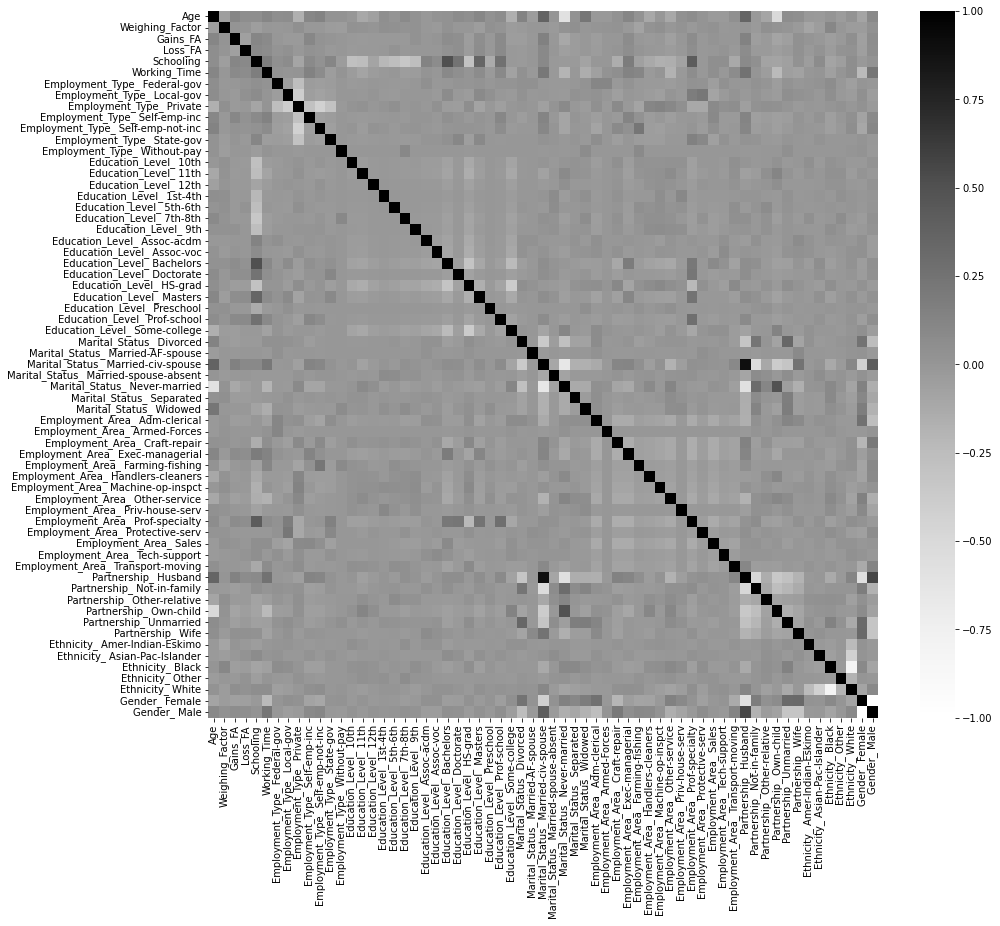

In [97]:
plt.figure(figsize=(15,13))
sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, center=0,cmap="Greys")
plt.show()

In [118]:
income_df = pd.DataFrame(data_w_income["Income"].apply(lambda x: -1 if x == " <=50K" else 1),columns=["Income"])
income_df.head()

,Income
0,-1
1,-1
2,-1
3,-1
4,-1


In [114]:
data_w_income["Income"].values == " <=50K"

array([ True,  True,  True, ..., False,  True,  True])

In [119]:
final_df = pd.concat([numeric_df,income_df],axis=1)
final_df.head()

,Age,Weighing_Factor,Gains_FA,Loss_FA,Schooling,Working_Time,Employment_Type_ Federal-gov,Employment_Type_ Local-gov,Employment_Type_ Private,Employment_Type_ Self-emp-inc,...,Partnership_ Unmarried,Partnership_ Wife,Ethnicity_ Amer-Indian-Eskimo,Ethnicity_ Asian-Pac-Islander,Ethnicity_ Black,Ethnicity_ Other,Ethnicity_ White,Gender_ Female,Gender_ Male,Income
0,3.688879,11.258253,7.684784,0.0,1.152189,-0.042864,0,0,0,0,...,0,0,0,0,0,0,1,0,1,-1
1,3.931826,11.330348,0.000000,0.0,1.152189,-2.272798,0,0,0,0,...,0,0,0,0,0,0,1,0,1,-1
2,3.663562,12.281398,0.000000,0.0,-0.425936,-0.042864,0,0,1,0,...,0,0,0,0,0,0,1,0,1,-1
3,3.988984,12.366157,0.000000,0.0,-1.214999,-0.042864,0,0,1,0,...,0,0,0,0,1,0,0,0,1,-1
4,3.367296,12.732013,0.000000,0.0,1.152189,-0.042864,0,0,1,0,...,0,1,0,0,1,0,0,1,0,-1


# Models

In [120]:
X = final_df.drop(columns=["Income"],axis=1)
y = final_df["Income"]

In [126]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=101,shuffle=True)

In [ ]:
data_no_income

### Logistic Regression

In [144]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()

In [145]:
LR.fit(X_train,y_train)

c:\Users\kshit\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [146]:
y_pred = LR.predict(X_test)

In [147]:
def evaulation(test_y:np.ndarray,pred_y:np.ndarray):
    from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

    print(f"Accuracy Score : {accuracy_score(test_y,pred_y)}")
    print(f"Recall Score : {recall_score(test_y,pred_y)}")
    print(f"Precision Score : {precision_score(test_y,pred_y)}")
    print(f"F1 Score : {f1_score(test_y,pred_y)}")

    print("\n")

    cm = confusion_matrix(test_y, pred_y)

    print(f"Confusion Matrix : \n{cm}")

In [148]:
evaulation(y_test,y_pred)

Accuracy Score : 0.842
Recall Score : 0.5469387755102041
Precision Score : 0.7403314917127072
F1 Score : 0.6291079812206573


Confusion Matrix : 
[[708  47]
 [111 134]]
